In [47]:
import numpy as np
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [48]:
#load data

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [51]:
#data Analyzing

In [52]:
x_train[3]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [53]:
y_train[36]

6

In [54]:
import matplotlib.pyplot as plt

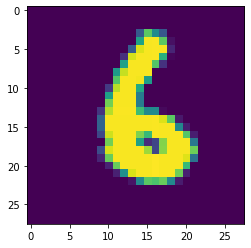

In [55]:
plt.imshow(x_train[36])

In [20]:
#shaping the data

In [21]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [22]:
# One hot encoding

In [56]:
no_of_classes=10
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [57]:
y_train[36]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [58]:
#model Building and adding cnn layers

In [59]:
model = Sequential()

In [60]:
model.add(Conv2D(32, (3,3),input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [61]:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))

In [62]:
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [63]:
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                  

In [65]:
# Compiling the Model

In [66]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [67]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [68]:
# train the model

In [69]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2180 - accuracy: 0.9457 - val_loss: 0.0703 - val_accuracy: 0.9792
Epoch 2/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.0525 - val_accuracy: 0.9834
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0523 - val_accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0445 - accuracy: 0.9868 - val_loss: 0.0320 - val_accuracy: 0.9900
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0374 - val_accuracy: 0.9893


In [70]:
# Testing the model

In [71]:
prediction = model.predict(x_test[:4])
prediction

array([[7.24848306e-11, 3.33208505e-09, 9.96728431e-07, 1.62609890e-08,
        6.72674208e-11, 1.27450593e-11, 2.45385953e-15, 9.99999046e-01,
        2.52338948e-11, 2.76468709e-10],
       [5.00392450e-10, 1.68492664e-09, 1.00000000e+00, 2.39126237e-13,
        2.16614443e-12, 3.54964985e-16, 1.59782354e-09, 2.75846698e-15,
        1.62074252e-13, 9.68221170e-15],
       [3.65464302e-07, 9.99934673e-01, 4.34723052e-06, 5.08762088e-10,
        5.10099890e-05, 1.01632445e-08, 1.14531638e-07, 6.54859696e-06,
        2.51533629e-06, 4.70770630e-07],
       [9.99997497e-01, 7.89965489e-12, 1.82842541e-09, 2.12711775e-11,
        1.04836140e-09, 1.76519421e-09, 2.44310263e-06, 3.34979413e-13,
        2.52503823e-10, 4.49977916e-10]], dtype=float32)

In [72]:
np.argmax(prediction, axis=1)

array([7, 2, 1, 0])

In [73]:
# Observing the metrics

In [74]:

metrics = model.evaluate(x_test, y_test, verbose=0)
print('METRICS\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(metrics[0],metrics[1]))

METRICS
 Loss: 0.037
 Accuracy: 0.989


In [75]:
# Saving the model

In [76]:
model.save("ibm_mnistcnn.h5")

In [77]:
ls


ibm_mnistcnn.h5


In [78]:
!tar -zcvf handwritten-model.tgz ibm_mnistcnn.h5

ibm_mnistcnn.h5


In [79]:
ls

handwritten-model.tgz  ibm_mnistcnn.h5


In [80]:
# installing watson machine learnig

In [81]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 23.7 MB/s eta 0:00:01


In [82]:
# setting up API 

In [100]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"U9-01qCyhJOTVZVC13rCJfAWUFc4NpTz8Y71PetFwmS0"
}

client = APIClient(wml_credentials)

In [101]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [102]:
space_uid = guid_from_space_name(client, "models")
space_uid

'4893b6ff-36ea-407c-b98f-efac56477fd8'

In [103]:
client.set.default_space(space_uid)

'SUCCESS'

In [104]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [105]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid 


'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [106]:
model_details = client.repository.store_model(model ='handwritten-model.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details)
model_id

'0f48d2b3-b498-4106-a3da-6a79a3ebaf05'

In [107]:
client.repository.download(model_id,"model.tar.gz")

File with name: 'model.tar.gz' already exists.


WMLClientError: File with name: 'model.tar.gz' already exists.

In [108]:
ls -l


total 2668
-rw-rw---- 1 wsuser wscommon 876410 Nov 18 10:48 handwritten-model.tgz
-rw-rw---- 1 wsuser wscommon 978360 Nov 18 10:48 ibm_mnistcnn.h5
-rw-rw---- 1 wsuser wscommon 876410 Nov 18 10:48 model.tar.gz


In [109]:
# Testing the model

In [110]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [111]:
model = load_model("ibm_mnistcnn.h5")

In [118]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DWUvCto2A40dTP4K-oNBG43Bg_mVsE_CAVAQSGysx93k',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'anovelmethodforhandwrittendigitre-donotdelete-pr-jmlhx3pxdbc7sw'
object_key = '0a.png'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [119]:
img = Image.open(streaming_body_3).convert("L")
img = img.resize( (28,28) )
img

In [120]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [121]:
pred = model.predict(im2arr)
print(pred)

[[0.0030775  0.00212496 0.25022712 0.1182601  0.255827   0.01342162
  0.00055322 0.03318353 0.14961338 0.1737115 ]]


In [122]:
print(np.argmax(pred, axis=1))

[4]
